### _<font color='blue'>Mental ilness in the World of Tech: Willingness to discuss mental health issues at work.</font>_

#### Question 1: Does this vary from country to country and could culture possibly be a factor? Are age and gender also factors? Is there a group that is more willing to talk regardless of whether there are support schemes at work?
#### Question 2: Do tech companies that DO offer mental health support shemes motivate people to discuss this topic? Do workers in these companies feel like they are supported by their employer or are they are still reluctant to speak?

### Step 1: Data Import & Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ds = pd.read_csv('survey.csv')

In [4]:
ds.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
#check dataset
ds.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [6]:
#check size
ds.shape

(1259, 27)

In [7]:
#check nulls
ds.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [8]:
#check if states only relate to USA
ds[(ds["Country"] != "United States") & (ds["state"].notnull())]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
319,2014-08-27 14:28:28,29,male,Latvia,NY,No,No,No,NaN,26-100,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
488,2014-08-27 16:21:54,26,Male,Israel,MD,No,No,No,Sometimes,6-25,...,Very easy,Maybe,No,Some of them,Yes,No,Maybe,Yes,No,Israel has public health insurance for everyon...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1179,2014-09-26 10:05:55,25,female,Bulgaria,UT,No,No,Yes,Sometimes,26-100,...,Don't know,Maybe,Maybe,Yes,Some of them,Maybe,No,No,No,NaN


In [9]:
#check if there are NaN in country otherwise state column can be dropped
ds["Country"].isnull().value_counts()

False    1259
Name: Country, dtype: int64

In [10]:
#dropping state column
ds.drop('state', axis=1, inplace=True)

In [11]:
#prepare time data for question 3 (converting to datetime formatting and removing the time)
ds['Timestamp'] = pd.to_datetime(ds['Timestamp'])
ds['Timestamp'] = [d.date() for d in ds['Timestamp']]

In [12]:
ds

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27,37,Female,United States,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27,44,M,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27,32,Male,Canada,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30,46,f,United States,No,No,No,NaN,100-500,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [13]:
#cleaning age column (removing numbers that most likely do not represent the real age of workers)
ds = ds[(ds.Age < 100) & (ds.Age > 18)]

In [14]:
ds.Age.describe()

count    1244.000000
mean       32.155949
std         7.231587
min        19.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

In [15]:
#cleaning Gender column
ds['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'Woman', 'f', 'Mal',
       'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman',
       'Make', 'Nah', 'Enby', 'fluid', 'Genderqueer', 'Female ',
       'Androgyne', 'Agender', 'cis-female/femme', 'Guy (-ish) ^_^',
       'male leaning androgynous', 'Male ', 'Man', 'Trans woman', 'msle',
       'Neuter', 'Female (trans)', 'queer', 'Female (cis)', 'Mail',
       'cis male', 'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [16]:
#dscopy = ds[ds["Gender"].isin(["MALE", "male", "Male", "m"])] = 'Male'
males_list = ['M', 'male', 'm', 'maile', 'Make', 'Man', 'msle', 'Malr', 'Male ', 'Mail']
females_list = ['F', 'female', 'f', 'Woman', 'Femake', 'woman', 'femail', 'Female ']
others_list = ['Male-ish', 'Trans-female', 'Cis Female',
       'something kinda male?', 'Cis Male', 'Mal', 'Male (CIS)',
       'queer/she/they', 'non-binary', 'Nah', 'All', 'Enby', 'fluid',
       'Genderqueer', 'Androgyne', 'Agender', 'cis-female/femme',
       'Guy (-ish) ^_^', 'male leaning androgynous', 'Trans woman',
       'Neuter', 'Female (trans)', 'queer', 'Female (cis)', 'Mail',
       'cis male', 'A little about you', 'p', 'Cis Man',
       'ostensibly male, unsure what that really means']
ds.loc[ds['Gender'].isin(males_list), 'Gender'] = 'Male'
ds.loc[ds['Gender'].isin(females_list), 'Gender'] = 'Female'
ds.loc[ds['Gender'].isin(others_list), 'Gender'] = 'Other'

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
ds['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

### Question 1: Countries

In [18]:
ds[(ds.Country == 'Austria') & (ds.supervisor == 'Some of them')]

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
139,2014-08-27,22,Male,Austria,No,No,No,NaN,6-25,Yes,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
526,2014-08-27,24,Male,Austria,Yes,No,No,Sometimes,1-5,No,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Yes,No,NaN


In [19]:
#filtering data on countries & columns coworkers and supervisor
#first need to get sum of maybe and yes 
ccountry_results = ds.groupby('Country').coworkers.agg(
    {'coworkers_yes': lambda x: (x == 'Yes').sum(),
    'coworkers_some': lambda x: (x == 'Some of them').sum()})
    
scountry_results = ds.groupby('Country').supervisor.agg(
    {'supervisor_yes': lambda x: (x == 'Yes').sum(),
    'supervisor_some': lambda x: (x == 'Some of them').sum()})
    
scountry_results

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  if __name__ == '__main__':


,supervisor_yes,supervisor_some
Country,,
Australia,11,3
Austria,1,2
Belgium,1,1
Bosnia and Herzegovina,0,0
Brazil,4,2
Bulgaria,1,2
Canada,28,24
China,0,1
Colombia,0,1


In [20]:
#filtering data set on totals for both supervisor and coworkers. Yes and Some of them will be added together
mg_country = pd.merge(ccountry_results, scountry_results, on='Country', how='left')
mg_country['coworkers_total'] = mg_country['coworkers_yes'] + mg_country['coworkers_some']
mg_country['supervisor_total'] = mg_country['supervisor_yes'] + mg_country['supervisor_some']
#mg_country1 = mg_country[['coworkers_total', 'supervisor_total']]

In [21]:
mg_country

,coworkers_yes,coworkers_some,supervisor_yes,supervisor_some,coworkers_total,supervisor_total
Country,,,,,,
Australia,4,11,11,3,15,14
Austria,1,2,1,2,3,3
Belgium,1,2,1,1,3,2
Bosnia and Herzegovina,0,0,0,0,0,0
Brazil,3,3,4,2,6,6
Bulgaria,2,1,1,2,3,3
Canada,11,49,28,24,60,52
China,0,1,0,1,1,1
Colombia,0,0,0,1,0,1


Text(0, 0.5, 'Survey Participants')

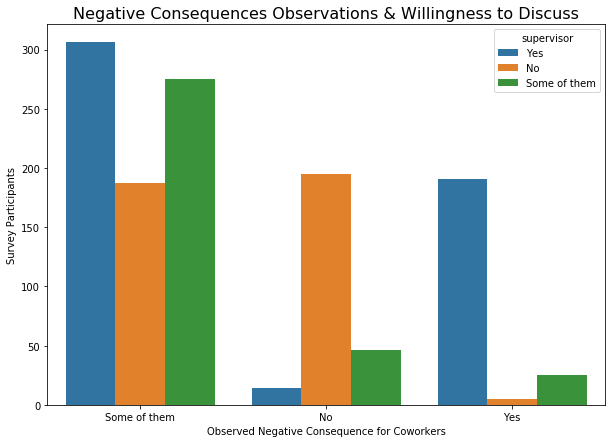

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(x="coworkers", hue="supervisor", hue_order = ['Yes','No','Some of them'], data=ds)
plt.title("Negative Consequences Observations & Willingness to Discuss", fontsize=16)
plt.xlabel("Observed Negative Consequence for Coworkers" )
plt.ylabel("Survey Participants")

In [23]:
country_resultstop10 = country_results.sort_values(by='would_speak_coworker', ascending=False)
country_resultstop10.reset_index()

NameError: name 'country_results' is not defined

In [24]:
#checking if the above is correct
ds[(ds.Country == 'Australia') & (ds.coworkers == 'Yes')]

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
531,2014-08-27,31,Male,Australia,No,No,Yes,Rarely,100-500,No,...,Somewhat easy,No,No,Yes,Yes,Yes,Yes,No,No,NaN
648,2014-08-28,26,Female,Australia,No,Yes,No,Sometimes,100-500,No,...,Somewhat easy,No,No,Yes,Yes,No,No,Don't know,No,Majority of qs on survey not relevant if you a...
1036,2014-08-29,26,Male,Australia,No,Yes,Yes,Sometimes,26-100,Yes,...,Don't know,No,No,Yes,Yes,No,Maybe,Yes,No,The questions related to employer-provided hea...
1107,2014-08-30,26,Male,Australia,No,Yes,Yes,Rarely,26-100,No,...,Very easy,No,No,Yes,Yes,Maybe,Yes,Yes,No,NaN


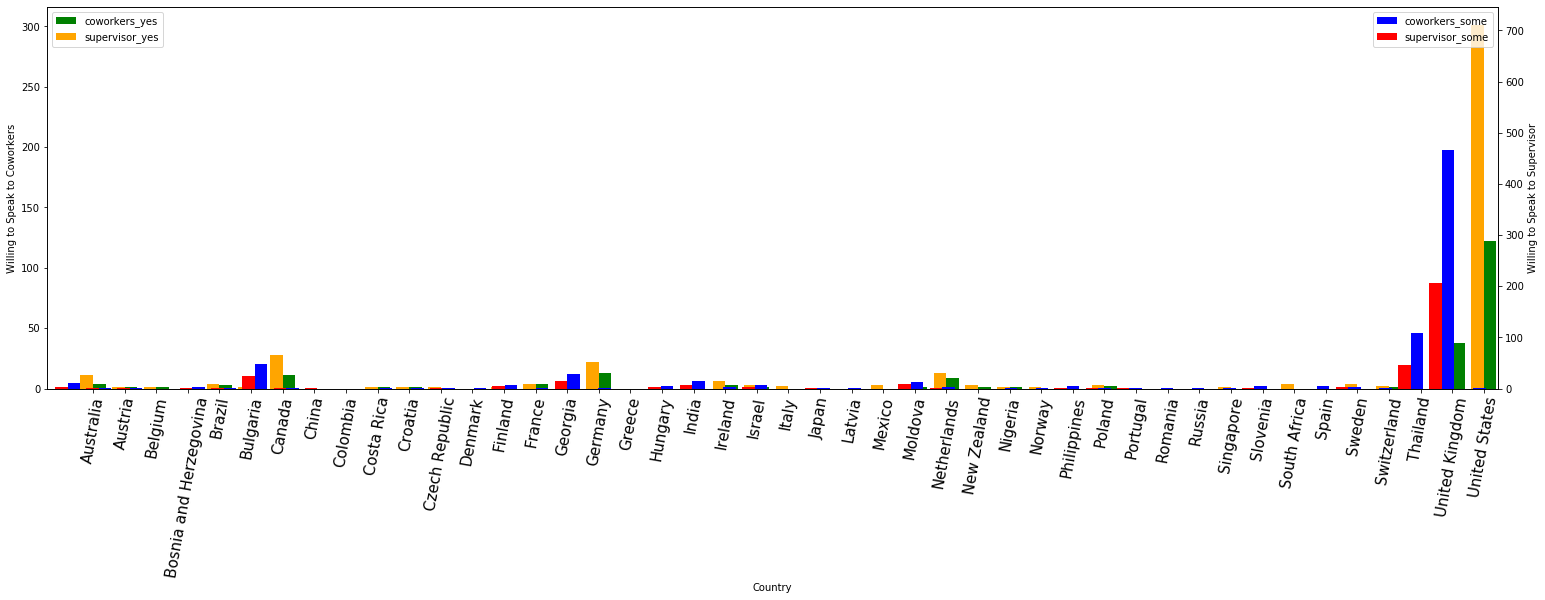

In [25]:
dftest = mg_country
fig = plt.figure(figsize=(26,10)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx()
width = .4

dftest.coworkers_yes.plot(kind='bar',color='green',ax=ax,width=width, position=0,linewidth=2)
dftest.coworkers_some.plot(kind='bar',color='blue', ax=ax2,width = width,position=2,linewidth=2)
dftest.supervisor_yes.plot(kind='bar',color='orange',ax=ax,width=width, position=1,linewidth=2)
dftest.supervisor_some.plot(kind='bar',color='red', ax=ax2,width = width,position=3,linewidth=2)

ax.grid(False)
ax2.grid(False)
#axplt.xticks(rotation=90)
ax.set_ylabel('Willing to Speak to Coworkers')
ax2.set_ylabel('Willing to Speak to Supervisor')
#label.set_rotation(40)
plt.margins(0.6)
ax.xaxis.set_tick_params(rotation=80, labelsize=15)
plt.title('',fontsize=30)
plt.subplots_adjust(bottom=0.35)
ax.legend()
ax2.legend()
#ax.set_xlim(-1,7)

### Question 1: Are people in certain age gaps more willing to discuss mental issues then others?

In [24]:
'''columns to analyse:
coworkers: Would you be willing to discuss a mental health issue with your coworkers?
supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?'''

'columns to analyse:\ncoworkers: Would you be willing to discuss a mental health issue with your coworkers?\nsupervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?'

In [25]:
#binning the ages by decade
ds['age_by_decade'] = pd.cut(x=ds['Age'], bins=[10,20,30,40,50,60,70,80], labels=['10s', '20s', '30s', '40s', '50s', '60s', '70s'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
ds[['Age', 'age_by_decade']]

,Age,age_by_decade
0,37,30s
1,44,40s
2,32,30s
3,31,30s
4,31,30s
...,...,...
1254,26,20s
1255,32,30s
1256,34,30s
1257,46,40s


In [26]:
#checking results from coworkers column
ds.coworkers.value_counts()

Some of them    768
No              255
Yes             221
Name: coworkers, dtype: int64

In [27]:
#checking results from supervisor column
ds.supervisor.value_counts()

Yes             511
No              387
Some of them    346
Name: supervisor, dtype: int64

In [28]:
#checking how people are willing to talk to their supervisors/coworkers depending on their age 
df_yes = ds.groupby('age_by_decade')[['coworkers','supervisor']].apply(lambda x: (x=='Yes').sum())
df_some = ds.groupby('age_by_decade')[['coworkers','supervisor']].apply(lambda x: (x == 'Some of them').sum())

KeyError: 'age_by_decade'

In [29]:
#creating df for results on age, adding a column with the total
age_results = df_yes + df_some
age_results['Total'] = age_results['coworkers'] + age_results['supervisor'] 
age_results = age_results.reset_index()

NameError: name 'df_yes' is not defined

In [30]:
age_results

NameError: name 'age_results' is not defined

In [31]:
#filtering data on countries & columns coworkers and supervisor
#first need to get sum of maybe and yes 
cage_results = ds.groupby('age_by_decade').coworkers.agg(
    {'coworkers_yes': lambda x: (x == 'Yes').sum(),
    'coworkers_some': lambda x: (x == 'Some of them').sum()})
    
sage_results = ds.groupby('age_by_decade').supervisor.agg(
    {'supervisor_yes': lambda x: (x == 'Yes').sum(),
    'supervisor_some': lambda x: (x == 'Some of them').sum()})
    
sage_results

KeyError: 'age_by_decade'

In [32]:
#filtering data set on totals for both supervisor and coworkers. Yes and Some of them will be added together
mg_age = pd.merge(cage_results, sage_results, on='age_by_decade', how='left')
mg_age['coworkers_total'] = mg_age['coworkers_yes'] + mg_age['coworkers_some']
mg_age['supervisor_total'] = mg_age['supervisor_yes'] + mg_age['supervisor_some']
#mg_country1 = mg_country[['coworkers_total', 'supervisor_total']]
final_age = mg_age[['coworkers_yes','coworkers_some','supervisor_yes','supervisor_some']]
final_age.rename(columns={"coworkers_yes": "All Coworkers", "coworkers_some": "Some coworkers", 'supervisor_yes': 'All Supervisors', 'supervisor_some': 'Some Supervisors'}, inplace=True)
final_age.index.names = ['Age Group']
final_age

NameError: name 'cage_results' is not defined

In [33]:
#checking if data is correct
ds[(ds.age_by_decade == '20s') & (ds.supervisor == 'Some of them')]

AttributeError: 'DataFrame' object has no attribute 'age_by_decade'

In [34]:
dftest1 = final_age
fig = plt.figure(figsize=(26,10)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx()
width = .2

dftest1.coworkers_yes.plot(kind='bar',color='green',ax=ax,width=width, position=0,linewidth=2)
dftest1.coworkers_some.plot(kind='bar',color='blue', ax=ax2,width = width,position=2,linewidth=2)
dftest1.supervisor_yes.plot(kind='bar',color='orange',ax=ax,width=width, position=1,linewidth=2)
dftest1.supervisor_some.plot(kind='bar',color='red', ax=ax2,width = width,position=3,linewidth=2)

#ax.grid(None)
#ax2.grid(None)
#axplt.xticks(rotation=90)
#ax.set_ylabel('Willing to Speak to Coworkers')
#ax2.set_ylabel('Willing to Speak to Supervisor')
#label.set_rotation(40)
#plt.margins(0.1)
ax.xaxis.set_tick_params(rotation=0, labelsize=30)
plt.title('',fontsize=30)
plt.subplots_adjust(bottom=0.40)
ax.legend(loc='upper left')
ax2.legend()
#ax.set_xlim(-1,7)

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

NameError: name 'final_age' is not defined

In [35]:
agedf = final_age.reset_index()

NameError: name 'final_age' is not defined

In [36]:
agedf.plot(kind='bar', x='Age Group', rot= 0, figsize=(15,5),width=.8 )
#plt.show()

NameError: name 'agedf' is not defined

### Question 1: Which gender is more willing to dicuss mental issues?

In [37]:
'''Columns to analyse:
coworkers: Would you be willing to discuss a mental health issue with your coworkers?
supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?'''

'Columns to analyse:\ncoworkers: Would you be willing to discuss a mental health issue with your coworkers?\nsupervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?'

In [38]:
#checking how people are willing to talk to their supervisors/coworkers depending on their gender
df_yes_g = ds.groupby('Gender')[['coworkers','supervisor']].apply(lambda x: (x=='Yes').sum())
df_some_g = ds.groupby('Gender')[['coworkers','supervisor']].apply(lambda x: (x == 'Some of them').sum())

In [39]:
#creating df for results on gender, adding a column with the total
gender_results = df_yes_g + df_some_g
gender_results['Total'] = gender_results['coworkers'] + gender_results['supervisor'] 
#gender_results = gender_results.reset_index()
gender_results

,coworkers,supervisor,Total
Gender,,,
Female,186,157,343
Male,783,681,1464
Other,20,19,39


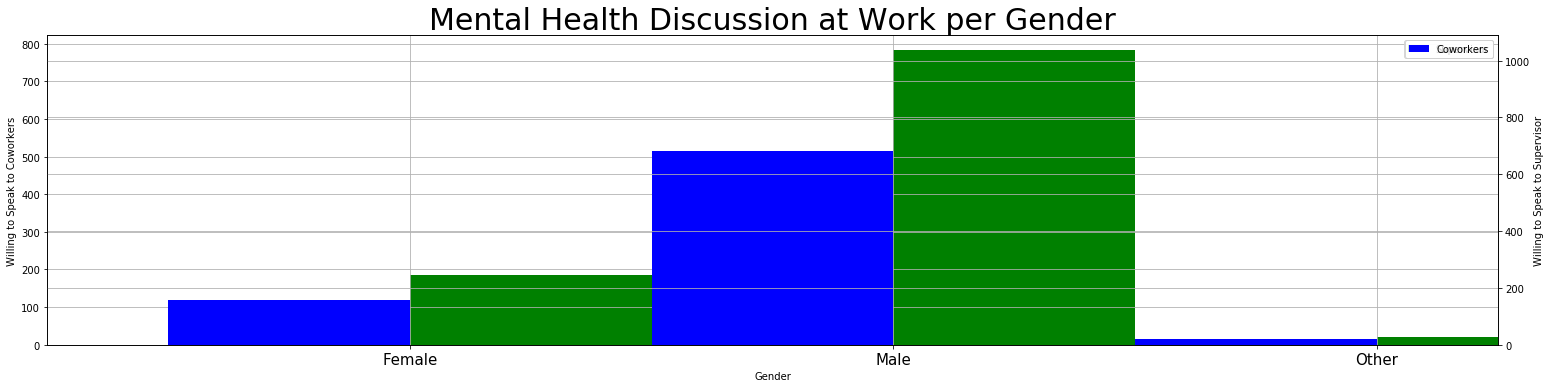

In [40]:
dftest2 = gender_results
fig = plt.figure(figsize=(26,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .5

dftest2.coworkers.plot(kind='bar',color='green',ax=ax,width=width, position=0,linewidth=2, label='Supervisor')
dftest2.supervisor.plot(kind='bar',color='blue', ax=ax2,width=width,position=1,linewidth=2, label='Coworkers')

ax.grid(None)
ax2.grid(None)
#axplt.xticks(rotation=90)
ax.set_ylabel('Willing to Speak to Coworkers')
ax2.set_ylabel('Willing to Speak to Supervisor')
#label.set_rotation(40)
plt.margins(0.6)
ax.xaxis.set_tick_params(rotation=0, labelsize=15)
plt.title('Mental Health Discussion at Work per Gender',fontsize=30)
plt.subplots_adjust(bottom=0.45)
ax.legend()
ax2.legend()
#ax.set_xlim(-1,7)

In [41]:
#finding the ratio

In [42]:
#finding the ratio of women/willing to the total amount of women. Same for men
total_female = len(ds[ds['Gender'] == 'Female'])
total_male = len(ds[ds['Gender'] == 'Male'])
total_other = len(ds[ds['Gender'] == 'Other'])

gender_results['Total'] = total_female, total_male, total_other

cfemale_percentage = ((gender_results['coworkers']/total_female)).tolist()
cmale_percentage = ((gender_results['coworkers']/total_male)).tolist()
cother_percentage = ((gender_results['coworkers']/total_other)).tolist()

sfemale_percentage = ((gender_results['supervisor']/total_female)).tolist()
smale_percentage = ((gender_results['supervisor']/total_male)).tolist()
sother_percentage = ((gender_results['supervisor']/total_other)).tolist()

gender_results['Percentage Coworkers'] = cfemale_percentage[0], cmale_percentage[0], cother_percentage[0]
gender_results['Percentage Supervisor'] = sfemale_percentage[0], smale_percentage[0], sother_percentage[0]
gender_results

,coworkers,supervisor,Total,Percentage Coworkers,Percentage Supervisor
Gender,,,,,
Female,186,157,243,0.765432,0.646091
Male,783,681,974,0.190965,0.161191
Other,20,19,27,6.888889,5.814815


In [43]:
gender_results2 = gender_results
gender_results2.reset_index()

,Gender,coworkers,supervisor,Total,Percentage Coworkers,Percentage Supervisor
0,Female,186,157,243,0.765432,0.646091
1,Male,783,681,974,0.190965,0.161191
2,Other,20,19,27,6.888889,5.814815


In [44]:
gender_results['supervisor'].value_counts()

19     1
681    1
157    1
Name: supervisor, dtype: int64

In [45]:
ds.groupby('Gender').size()

Gender
Female    243
Male      974
Other      27
dtype: int64

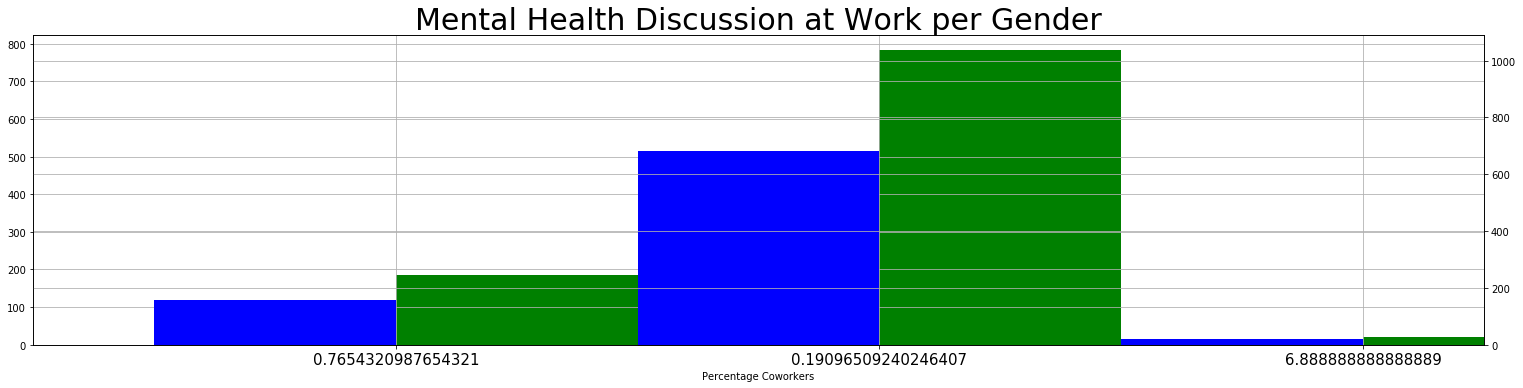

In [46]:
dftest3 = gender_results.set_index('Percentage Coworkers')
fig = plt.figure(figsize=(26,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .5

dftest3.coworkers.plot(kind='bar',color='green',ax=ax,width=width, position=0,linewidth=2)
dftest3.supervisor.plot(kind='bar',color='blue',ax=ax2,width=width,position=1,linewidth=2)

ax.grid(None)
ax2.grid(None)
#axplt.xticks(rotation=90)
#ax.set_ylabel('Willing to Speak to Coworkers')
#ax2.set_ylabel('Willing to Speak to Supervisor')
#label.set_rotation(40)
plt.margins(0.6)
ax.xaxis.set_tick_params(rotation=0, labelsize=15)
plt.title('Mental Health Discussion at Work per Gender',fontsize=30)
plt.subplots_adjust(bottom=0.45)
#ax.legend()
#ax2.legend()
#ax.set_xlim(-1,7)

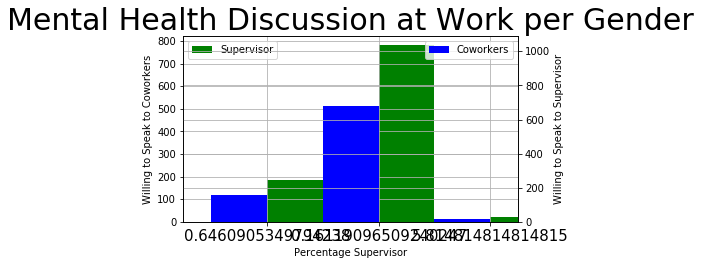

In [47]:
dftest3 = gender_results.set_index('Percentage Supervisor')
fig = plt.figure(figsize=(6,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .5

dftest3.coworkers.plot(kind='bar',color='green',ax=ax,width=width, position=0,linewidth=2, label='Supervisor')
dftest3.supervisor.plot(kind='bar',color='blue', ax=ax2,width=width,position=1,linewidth=2, label='Coworkers')

ax.grid(None)
ax2.grid(None)
#axplt.xticks(rotation=90)
ax.set_ylabel('Willing to Speak to Coworkers')
ax2.set_ylabel('Willing to Speak to Supervisor')
#label.set_rotation(40)
plt.margins(0.6)
ax.xaxis.set_tick_params(rotation=0, labelsize=15)
plt.title('Mental Health Discussion at Work per Gender',fontsize=30)
plt.subplots_adjust(bottom=0.45)
ax.legend()
ax2.legend()
#ax.set_xlim(-1,7)

In [ ]:
ds['Gender'].value_counts(normalize=True) * 100

In [61]:
#filtering data on countries & columns coworkers and supervisor
#first need to get sum of maybe and yes 
cgender_results = ds.groupby('Gender').coworkers.agg(
    {'coworkers_yes': lambda x: (x == 'Yes').sum(),
    'coworkers_some': lambda x: (x == 'Some of them').sum()})
    
sgender_results = ds.groupby('Gender').supervisor.agg(
    {'supervisor_yes': lambda x: (x == 'Yes').sum(),
    'supervisor_some': lambda x: (x == 'Some of them').sum()})
    
sgender_results

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  if __name__ == '__main__':


,supervisor_yes,supervisor_some
Gender,,
Female,74,83
Male,432,249
Other,5,14


In [62]:
#filtering data set on totals for both supervisor and coworkers. Yes and Some of them will be added together
mg_gender = pd.merge(cgender_results, sgender_results, on='Gender', how='left')
mg_gender['coworkers_total'] = mg_gender['coworkers_yes'] + mg_gender['coworkers_some']
mg_gender['supervisor_total'] = mg_gender['supervisor_yes'] + mg_gender['supervisor_some']
#mg_country1 = mg_country[['coworkers_total', 'supervisor_total']]
mg_gender

,coworkers_yes,coworkers_some,supervisor_yes,supervisor_some,coworkers_total,supervisor_total
Gender,,,,,,
Female,33,153,74,83,186,157
Male,184,599,432,249,783,681
Other,4,16,5,14,20,19


In [48]:
final_gender = mg_gender[['coworkers_yes','coworkers_some','supervisor_yes','supervisor_some']]
final_gender.rename(columns={"coworkers_yes": "All Coworkers", "coworkers_some": "Some coworkers", 'supervisor_yes': 'All Supervisors', 'supervisor_some': 'Some Supervisors'}, inplace=True)
final_gender.index.names = ['Gender']
final_gender

NameError: name 'mg_gender' is not defined

In [49]:
ffinal_gender = final_gender.reset_index()
ffinal_gender

NameError: name 'final_gender' is not defined

In [50]:
ffinal_gender.plot(kind='bar', x='Gender', rot= 0, figsize=(15,5),width=.8 )
#plt.show()

NameError: name 'ffinal_gender' is not defined

In [51]:
total_female = len(ds[ds['Gender'] == 'Female'])
total_male = len(ds[ds['Gender'] == 'Male'])
total_other = len(ds[ds['Gender'] == 'Other'])

mg_gender['Total'] = total_female, total_male, total_other

cyfemale_percentage = ((mg_gender['coworkers_yes']/total_female)).tolist()
cymale_percentage = ((mg_gender['coworkers_yes']/total_male)).tolist()
cyother_percentage = ((mg_gender['coworkers_yes']/total_other)).tolist()

csfemale_percentage = ((mg_gender['coworkers_some']/total_female)).tolist()
csmale_percentage = ((mg_gender['coworkers_some']/total_male)).tolist()
csother_percentage = ((mg_gender['coworkers_some']/total_other)).tolist()

syfemale_percentage = ((mg_gender['supervisor_yes']/total_female)).tolist()
symale_percentage = ((mg_gender['supervisor_yes']/total_male)).tolist()
syother_percentage = ((mg_gender['supervisor_yes']/total_other)).tolist()

ssfemale_percentage = ((mg_gender['supervisor_some']/total_female)).tolist()
ssmale_percentage = ((mg_gender['supervisor_some']/total_male)).tolist()
ssother_percentage = ((mg_gender['supervisor_some']/total_other)).tolist()

mg_gender['Percentage Coworkers Yes'] = cfemale_percentage[0], cmale_percentage[0], cother_percentage[0]
mg_gender['Percentage Coworkers Some'] = sfemale_percentage[0], smale_percentage[0], sother_percentage[0]
#mg_gender

mg_gender['coworkers_yes']/total_female

NameError: name 'mg_gender' is not defined

In [52]:
gender_df = ds[['Gender','coworkers','supervisor']]
female_res = gender_df[gender_df['Gender']=='Female']
male_res = gender_df[gender_df['Gender']=='Male']
other_res = gender_df[gender_df['Gender']=='Other']

In [53]:
coworker_fe = (ds['coworkers'].value_counts()/total_female).sort_values()
supervisor_fe = (ds['supervisor'].value_counts()/total_female).sort_values()
coworker_m = (ds['coworkers'].value_counts()/total_male).sort_values()
supervisor_m = (ds['supervisor'].value_counts()/total_male).sort_values()
coworker_o = (ds['coworkers'].value_counts()/total_other).sort_values()
supervisor_o = (ds['supervisor'].value_counts()/total_other).sort_values()
df = [coworker_fe,supervisor_fe,coworker_m,supervisor_m,coworker_o,supervisor_o]
gender_ds = pd.DataFrame(df)
copygender = gender_ds.transpose()
ccopygender = copygender.reset_index(level=0)
#ccopygender.columns=['Response', 'Female/Coworkers', 'Female/Supervisor', 'Male/Coworkers', 'Male/Supervisor','Other/Coworkers', 'Other/Supervisor']
#ccopygender['Female/Coworkers']

In [54]:
ccopygender

,index,coworkers,supervisor,coworkers,supervisor,coworkers,supervisor
0,Yes,0.909465,2.102881,0.226899,0.524641,8.185185,18.925926
1,No,1.049383,1.592593,0.261807,0.397331,9.444444,14.333333
2,Some of them,3.160494,1.423868,0.788501,0.355236,28.444444,12.814815


In [55]:
labels = ['Yes', 'No', 'Some of Them']
sizes = ccopygender['Female/Coworkers']
explode = (0, 0, 0.9)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Female Employees & Coworkers',fontsize=15)
plt.show()

KeyError: 'Female/Coworkers'

In [ ]:
labels = ['Yes', 'No', 'Some of Them']
sizes = ccopygender['Female/Supervisor']
explode = (0, 0, 0.9)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Female Employees & Supervisor',fontsize=15)
plt.show()

In [ ]:
labels = ['Yes', 'No', 'Some of Them']
sizes = ccopygender['Male/Supervisor']
explode = (0, 0, 0.9)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Male Employees & Supervisor',fontsize=15)
plt.show()

In [ ]:
labels = ['Yes', 'No', 'Some of Them']
sizes = ccopygender['Male/Coworkers']
explode = (0, 0, 0.9)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Male Employees & Coworkers',fontsize=15)
plt.show()

### Question 2: Do mental health support shemes at work motivate people to discuss more openly even in the working environment with employer and amongs themselves?

In [ ]:
'''Columns to analyse:
seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
- if yes, check the above against:

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
-Then check:

coworkers: Would you be willing to discuss a mental health issue with your coworkers?
supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?'''

In [74]:
#filter dataset on rows where the person has confirmed that their workplace offers a support scheme
ds['seek_help'].value_counts()

No            638
Don't know    359
Yes           247
Name: seek_help, dtype: int64

In [75]:
ds_q2 = ds[(ds['seek_help'] == 'Yes')]

In [76]:
#filter dataset by selecting the columns that are relevant to this question, renaming the column names to make them more clear
ds_q2 = ds_q2[['obs_consequence', 'mental_health_consequence','coworkers','supervisor','Gender', 'age_by_decade', 'Country']]
ds_q2.rename(columns={'mental_health_consequence': 'if_consequence', 'coworkers': 'would_speak_coworker', 'supervisor': 'would_speak_supervisor'}, inplace=True)

In [77]:
#checking for NaN values
ds_q2.isnull().sum()

obs_consequence           0
if_consequence            0
would_speak_coworker      0
would_speak_supervisor    0
Gender                    0
age_by_decade             0
Country                   0
dtype: int64

In [78]:
ds_q2['obs_consequence'].value_counts()

No     197
Yes     50
Name: obs_consequence, dtype: int64

In [79]:
ds_q2['if_consequence'].value_counts()

No       119
Maybe     83
Yes       45
Name: if_consequence, dtype: int64

In [80]:
ds_q2['would_speak_coworker'].value_counts()

Some of them    157
Yes              49
No               41
Name: would_speak_coworker, dtype: int64

In [ ]:
#converting strings into numerical values
ds_coworkers = ds_q2.would_speak_coworker.map({'No': 1, 'Yes': 2, 'Some of them':3})
ds_supervisor = ds_q2.would_speak_supervisor.map({'No': 1, 'Yes': 2, 'Some of them':3})

In [ ]:
#converting strings into numerical values
obs_consequence = ds_q2.obs_consequence.map({'No': 1, 'Yes': 2})
if_consequence = ds_q2.if_consequence.map({'No': 1, 'Yes': 2, 'Maybe': 3})
gender = ds_q2.Gender.map({'Female': 1, 'Male': 2, 'Other': 3})

In [ ]:
#building new dataframe by joining the series created above (now with numerical data)
q2 = pd.concat([obs_consequence, if_consequence, ds_coworkers, ds_supervisor], axis=1)

In [81]:
q2

NameError: name 'q2' is not defined

Text(0, 0.5, 'Survey Participants')

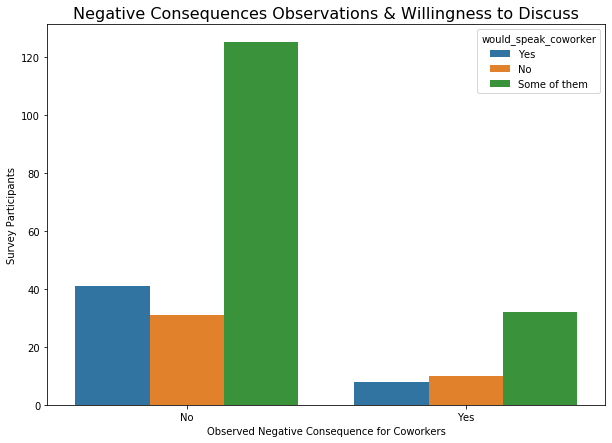

In [82]:
plt.figure(figsize=(10,7))
sns.countplot(x="obs_consequence", hue="would_speak_coworker", hue_order = ['Yes','No','Some of them'], data=ds_q2)
plt.title("Negative Consequences Observations & Willingness to Discuss", fontsize=16)
plt.xlabel("Observed Negative Consequence for Coworkers" )
plt.ylabel("Survey Participants")

In [ ]:
#checking the plot is correct
ds_q2[(ds_q2.obs_consequence == 'No') & (ds_q2.would_speak_coworker == 'Some of them')]

Text(0, 0.5, 'Survey Participants')

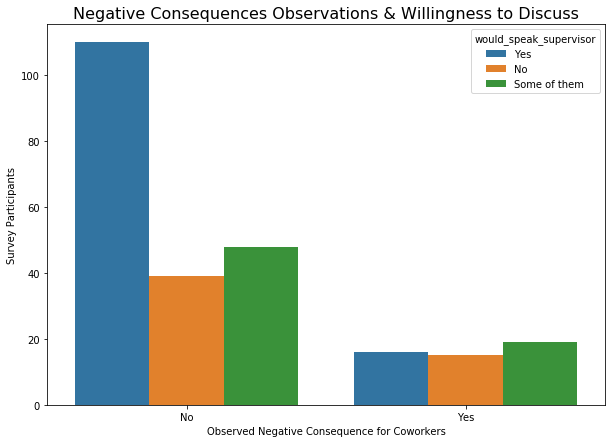

In [83]:
plt.figure(figsize=(10,7))
sns.countplot(x="obs_consequence", hue="would_speak_supervisor", hue_order = ['Yes','No','Some of them'], data=ds_q2)
plt.title("Negative Consequences Observations & Willingness to Discuss", fontsize=16)
plt.xlabel("Observed Negative Consequence for Coworkers" )
plt.ylabel("Survey Participants")

In [ ]:
sns.catplot(x='Timestamp', y='coworkers', data=ds, aspect=2)
plt.title('With duplicate records', weight='bold', fontsize=16)
xticks_dates = [datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S') for x in xticks]
ax.set_xticklabels(xticks_dates)
#plt.show()q2

In [ ]:
dscopy = ds

In [ ]:
dscopy['Timestamp'] = pd.to_datetime(dscopy['Timestamp'], unit='ms')